# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')
sys.path.append('../..')

import numpy as np
from metabatt.utils import get_input_count, calculate_beam_lengths
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [4]:
cell_size = [2, 2]
original_angles = [0, 30, 90, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)
print(calculate_beam_lengths(cell_size, original_angles))
#lengths, angles = [1.0, 0.5176380902], [0, 30, 97.69932995, 180]
#lengths, angles = [0.5, 0.86602540378, 1.0], [0, 30, 90,180]
#lengths = [1.0]
#angles = [0, 45, 135, 180]
print(lengths, angles)
lengths = [0.5,1.0, 1.118033988749895] 
angles = [0, 26.565051177077994, 90, 180]

([0.5, 1.0, 1.118033988749895], [0, 26.565051177077994, 90, 153.434948822922, 180])
[0.5, 1.0, 1.118033988749895] [0, 26.565051177077994, 90, 153.434948822922, 180]


prefill replay memory
start training
 new max record arrange grid:  2.13


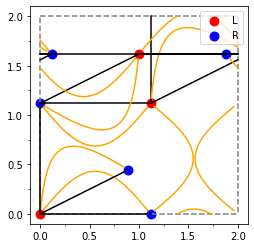

 new max record arrange grid:  2.2500000000000004


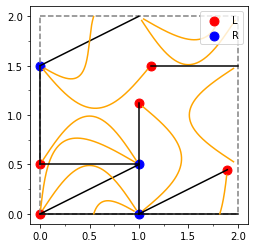

 new max record arrange grid:  3.0300000000000002


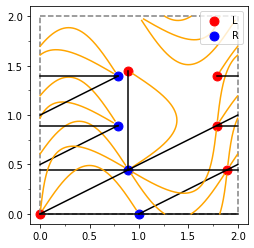

 new max record arrange grid:  3.09


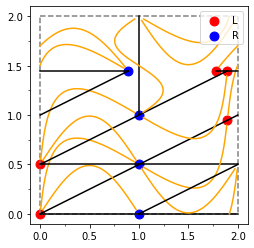

 new max record arrange grid:  3.2199999999999998


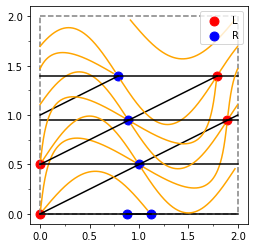

   10 mean training reward:  2.25
   20 mean training reward:  1.94
   30 mean training reward:  2.02
   40 mean training reward:  1.99
   50 mean training reward:  2.09
   60 mean training reward:  1.97
 new max record arrange grid:  3.34


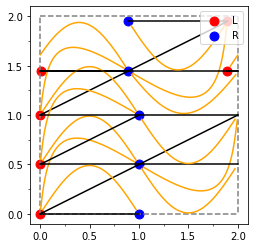

   70 mean training reward:  2.22
 new max record arrange grid:  3.37


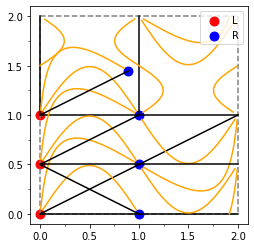

   80 mean training reward:  2.45
   90 mean training reward:  2.25
 new max record arrange grid:  3.62


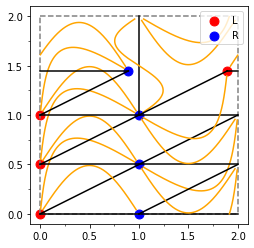

  100 mean training reward:  2.56
 new max record arrange grid:  3.6500000000000004


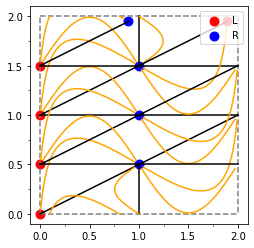

  110 mean training reward:  2.23
  120 mean training reward:  2.51
  130 mean training reward:  2.25
  140 mean training reward:  2.00
  150 mean training reward:  2.27
 new max record arrange grid:  4.150000000000001


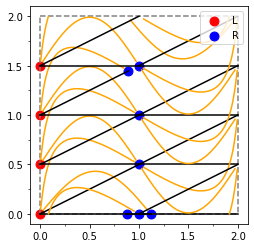

  160 mean training reward:  2.28
  170 mean training reward:  2.06
  180 mean training reward:  2.46
  190 mean training reward:  2.31
 new max record arrange grid:  4.180000000000001


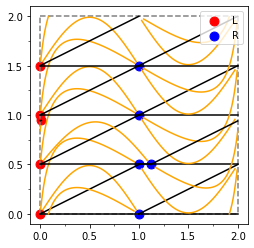

  200 mean training reward:  2.80
  210 mean training reward:  2.73
 new max record arrange grid:  4.240000000000001


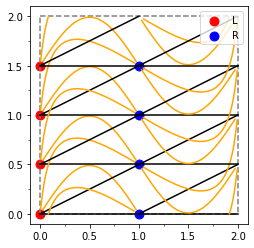

  220 mean training reward:  2.55
  230 mean training reward:  2.58
  240 mean training reward:  2.57
  250 mean training reward:  2.69
  260 mean training reward:  2.49
  270 mean training reward:  2.61
  280 mean training reward:  3.31
  290 mean training reward:  3.16
  300 mean training reward:  2.54
  310 mean training reward:  2.38
  320 mean training reward:  3.09
  330 mean training reward:  2.37
  340 mean training reward:  2.71
  350 mean training reward:  2.94
  360 mean training reward:  2.65
  370 mean training reward:  2.37
  380 mean training reward:  2.53
  390 mean training reward:  2.49
  400 mean training reward:  3.08
  410 mean training reward:  2.24
  420 mean training reward:  2.80
  430 mean training reward:  2.29
  440 mean training reward:  2.53
  450 mean training reward:  2.77
  460 mean training reward:  2.58
  470 mean training reward:  2.51
  480 mean training reward:  2.85
  490 mean training reward:  2.51
  500 mean training reward:  2.61
done


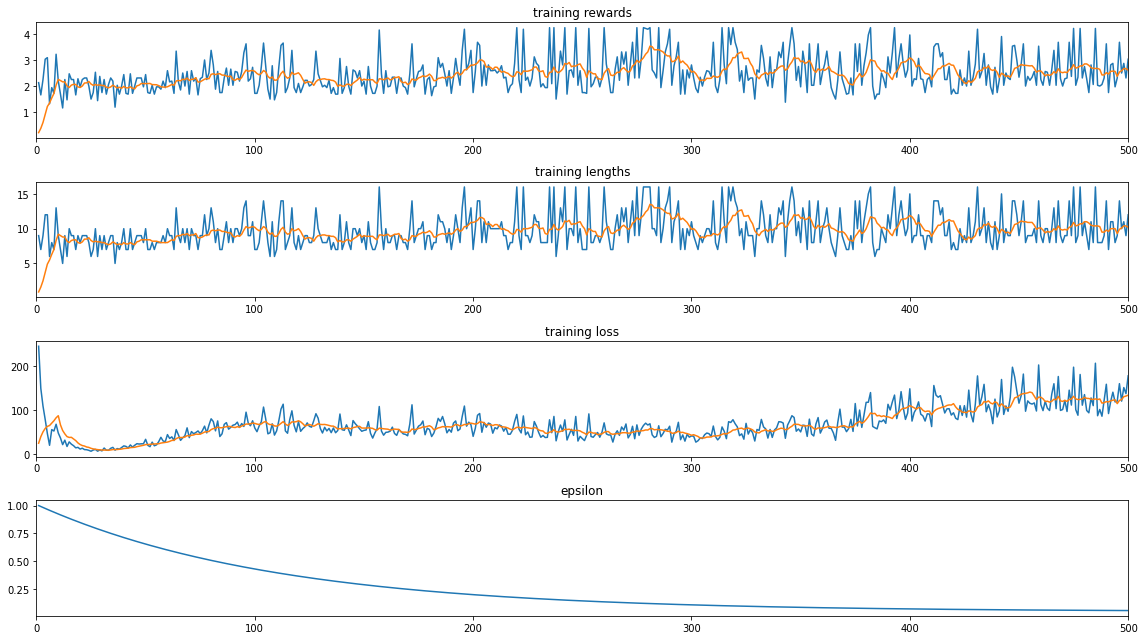

[2.13, 2.13, 2.2500000000000004, 2.2500000000000004, 3.0300000000000002, 3.0300000000000002, 3.09, 3.09, 3.2199999999999998, 3.2199999999999998, 3.34, 3.34, 3.37, 3.37, 3.62, 3.62, 3.6500000000000004, 3.6500000000000004, 4.150000000000001, 4.150000000000001, 4.180000000000001, 4.180000000000001, 4.240000000000001, 4.240000000000001]
[1, 3, 3, 4, 4, 5, 5, 9, 9, 64, 64, 80, 80, 96, 96, 104, 104, 157, 157, 196, 196, 220, 220, 500]


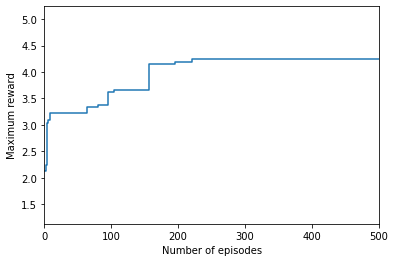

In [6]:
n_inputs = get_input_count(angles)
# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs,
                           allow_frustrations=False)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=10, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

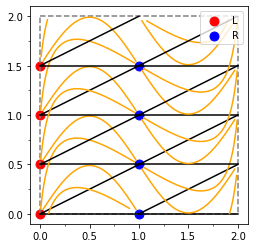

reward=4.240000000000001


In [7]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.bend_edges()
best_graph.plot()

area = best_graph.x_size * best_graph.y_size
reward = best_graph.total_edge_length()/area
print(f"{reward=}")

In [9]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams_nofrustration')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model_nofrustration')

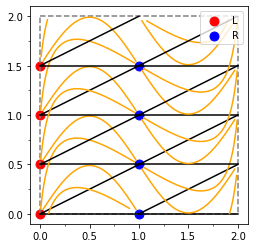

Score without frustrated edges: 4.240000000000001


In [10]:
graph = Graph.load_graph_state('best_graph_nofrustration')
graph.bend_edges()
graph.plot()
print(f"Score without frustrated edges: {graph.get_graph_score()}")

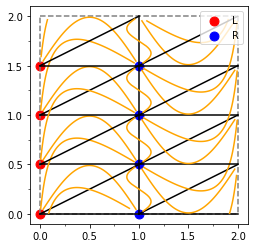

Score with frustrated edges: 4.740000000000001


In [11]:
graph.add_frustrated_edges()
graph.plot()
print(f"Score with frustrated edges: {graph.get_graph_score()}")

prefill replay memory
start training
 new max record arrange grid:  2.5000000000000004


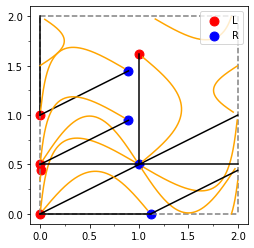

 new max record arrange grid:  3.2800000000000007


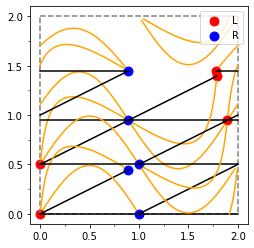

 new max record arrange grid:  3.5900000000000007


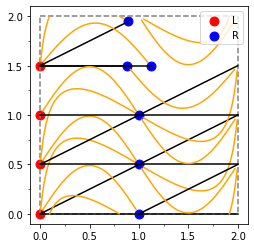

   10 mean training reward:  2.66
   20 mean training reward:  2.08
   30 mean training reward:  2.27
   40 mean training reward:  2.69
   50 mean training reward:  2.28
 new max record arrange grid:  4.210000000000001


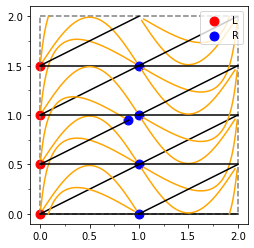

   60 mean training reward:  2.34
   70 mean training reward:  2.42
   80 mean training reward:  2.22
   90 mean training reward:  2.32
  100 mean training reward:  2.26
 new max record arrange grid:  4.240000000000001


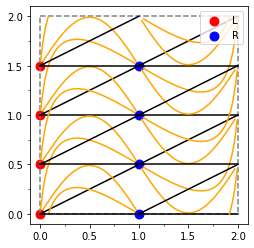

  110 mean training reward:  2.89
  120 mean training reward:  2.76
  130 mean training reward:  2.61
  140 mean training reward:  2.66
  150 mean training reward:  2.70
  160 mean training reward:  2.95
  170 mean training reward:  2.28
  180 mean training reward:  2.47
  190 mean training reward:  2.59
  200 mean training reward:  2.43
  210 mean training reward:  2.38
  220 mean training reward:  2.64
  230 mean training reward:  2.64
  240 mean training reward:  2.67
  250 mean training reward:  2.96
  260 mean training reward:  2.82
  270 mean training reward:  2.65
  280 mean training reward:  2.76
  290 mean training reward:  2.79
  300 mean training reward:  2.46
  310 mean training reward:  2.61
  320 mean training reward:  2.33
  330 mean training reward:  3.00
  340 mean training reward:  3.09
  350 mean training reward:  3.06
  360 mean training reward:  2.39
  370 mean training reward:  2.36
  380 mean training reward:  2.55
  390 mean training reward:  2.46
  400 mean tra

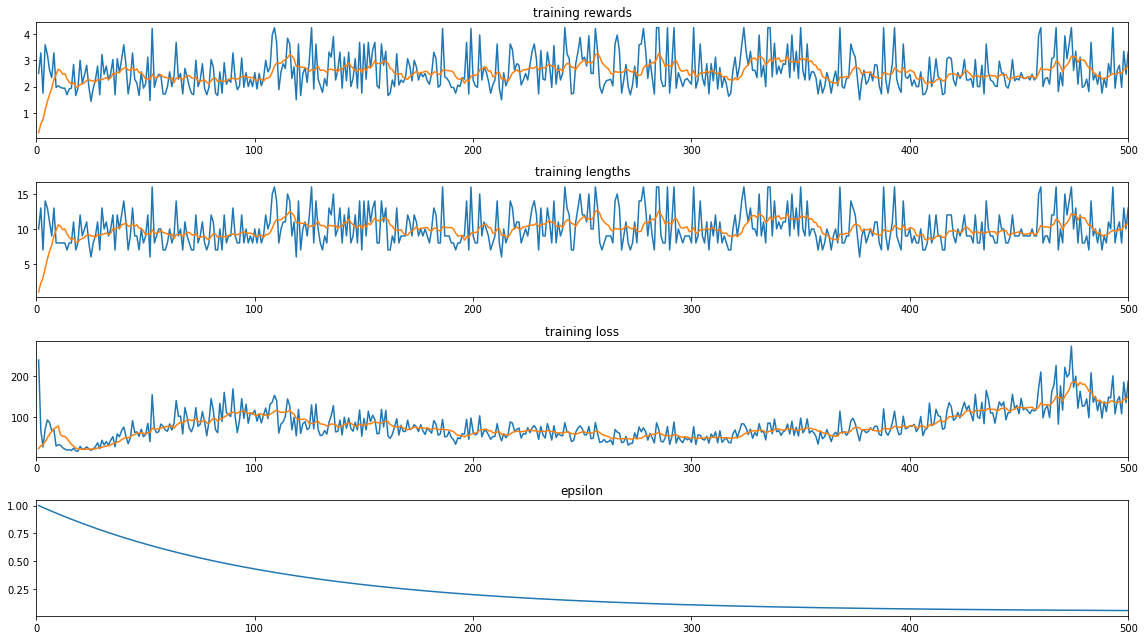

[2.5000000000000004, 2.5000000000000004, 3.2800000000000007, 3.2800000000000007, 3.5900000000000007, 3.5900000000000007, 4.210000000000001, 4.210000000000001, 4.240000000000001, 4.240000000000001]
[1, 2, 2, 4, 4, 53, 53, 109, 109, 500]


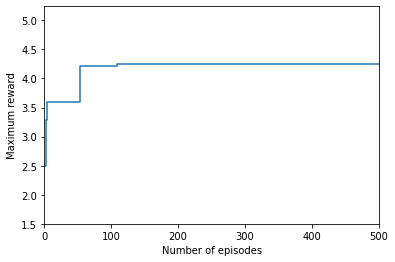

In [12]:
n_inputs = get_input_count(angles)
# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs,
                           allow_frustrations=True)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=10, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

prefill replay memory
start training
 new max record arrange grid:  3.5


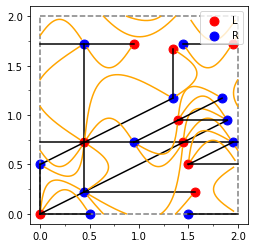

 new max record arrange grid:  3.7199999999999998


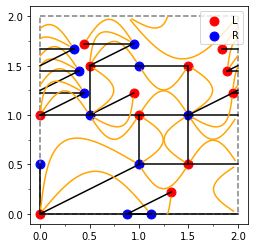

 new max record arrange grid:  4.0


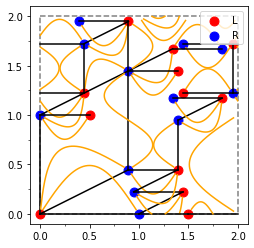

   10 mean training reward:  3.04
   20 mean training reward:  2.93
   30 mean training reward:  2.92
   50 mean training reward:  2.97
 new max record arrange grid:  4.155


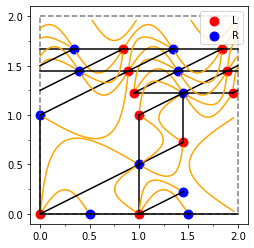

   60 mean training reward:  3.07
   70 mean training reward:  3.01
   80 mean training reward:  3.04
   90 mean training reward:  3.06
  100 mean training reward:  3.06
  110 mean training reward:  3.20
  120 mean training reward:  3.00
  130 mean training reward:  3.03
  140 mean training reward:  3.13
 new max record arrange grid:  4.740000000000001


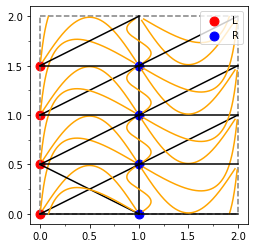

  150 mean training reward:  3.35
  160 mean training reward:  3.07
  170 mean training reward:  2.83
  180 mean training reward:  2.95
  190 mean training reward:  3.03
  200 mean training reward:  3.06
  210 mean training reward:  3.16
  220 mean training reward:  2.93
  230 mean training reward:  2.99
  240 mean training reward:  3.05
  250 mean training reward:  3.29
  260 mean training reward:  3.27
  270 mean training reward:  3.34
  280 mean training reward:  3.48
  290 mean training reward:  3.46
  300 mean training reward:  3.20
  310 mean training reward:  3.39
  320 mean training reward:  3.14
  330 mean training reward:  3.06
  340 mean training reward:  3.26
  350 mean training reward:  3.21
  360 mean training reward:  2.91
  370 mean training reward:  3.15
  380 mean training reward:  3.10
  390 mean training reward:  2.81
  400 mean training reward:  3.01
  410 mean training reward:  3.15
  420 mean training reward:  3.10
  430 mean training reward:  3.27
  440 mean tra

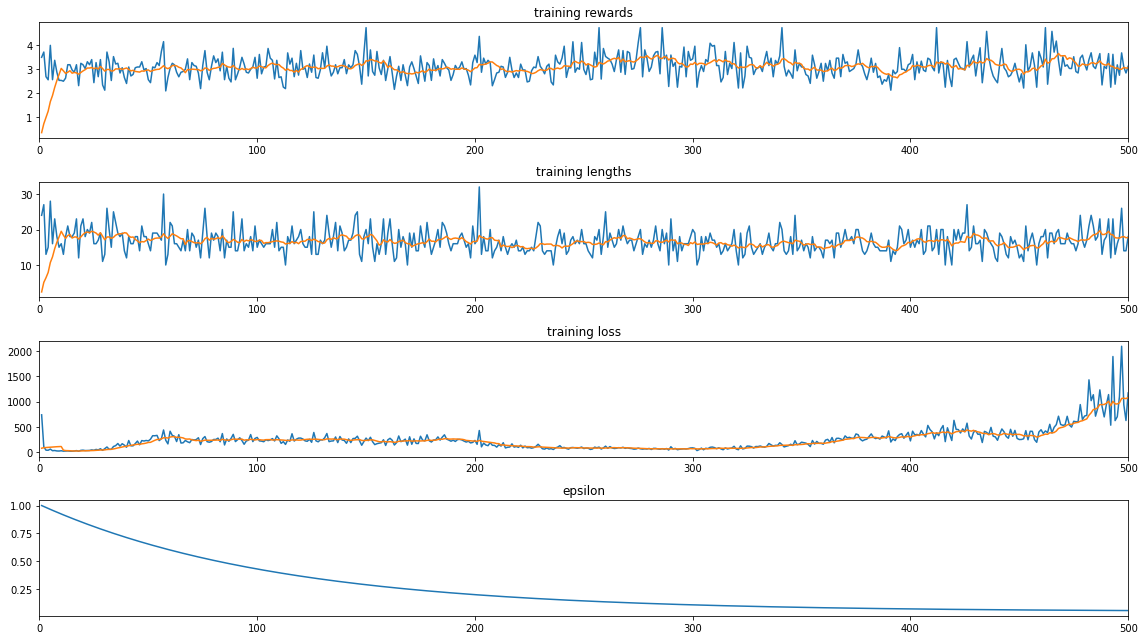

[3.5, 3.5, 3.7199999999999998, 3.7199999999999998, 4.0, 4.0, 4.155, 4.155, 4.740000000000001, 4.740000000000001]
[1, 2, 2, 5, 5, 57, 57, 150, 150, 500]


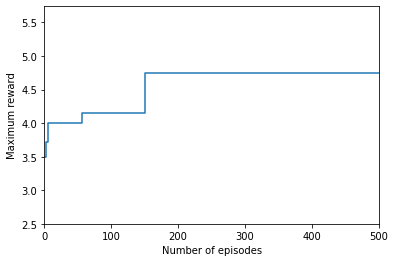

In [5]:
#added 0.5 length 
n_inputs = get_input_count(angles)
# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs,
                           allow_frustrations=True)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=10, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished